**Assignment 2 - Image Enhancement and Filtering**

Author : Endi Daniel Coelho Silva





In [3]:
import imageio
import math
import numpy as np
import matplotlib.pyplot as plt

**Function definitions:**



In [4]:

def aplicaConvolucao(input_img,filtro):
    N,M = input_img.shape
    n,m = filtro.shape
    #invert the filter
    filtro = np.flip(np.flip(filtro,0),1)
    output_img = np.zeros(input_img.shape, dtype=int)
    #calculate the range of the filter
    a = int((n-1)/2)
    b = int((m-1)/2)
    #for each valid pixel apply convolution
    for x in range(a, N-a):
        for y in range(b,M-b):
            vizinhanca = input_img[x-a:x+(a+1), y-b: y+(b+1)]
            output_img[x,y] = np.sum(np.multiply(vizinhanca,filtro))
    
    return output_img 

# apply normalization (0-255)
def aplicaNormalizacao(image):
    a = np.amin(image)
    b = np.amax(image)
    
    output_img = ( (image-a)*255 )/(b-a) 
    return output_img

#Gaussian Kernel
def Gaussian(x,var):
    g =  (1/( (2*np.pi) * (var*var) )) * (np.exp(-(  (x*x) / (2*(var*var))  )))
    return g

#calculate the Bilateral Filter for a pixel
def aplicaFiltroNaVizinhanca(input_img,pos_x,pos_y,a,b,r,s):
    input_img = input_img.astype(np.float)
    #insensity level of the pixel
    intensidadePixel = input_img[pos_x][pos_y]
    novoValor = 0
    wp = 0
    for i in range (-a,a+1):
        for j in range (-b,b+1):
            #intensity level of the neighbor pixel
            intensidadeVizinho = input_img[pos_x+i][pos_y+j]
            #Gaussian Range
            gr = Gaussian(intensidadeVizinho-intensidadePixel,r)
            distance = np.sqrt((i*i)+(j*j))
            #Gaussian Spatial
            gs = Gaussian(distance,s)
            wi = gr * gs
            wp+=wi
            novoValor +=  input_img[pos_x+i][pos_y+j] * wi
    novoValor = novoValor / wp
    #return the new value
    return novoValor

def bilateralFilter(input_img,n,r,s):
    sizeBorder = int(n/2)
    input_img = np.pad(input_img, pad_width=sizeBorder, mode='constant', constant_values=0) 
    output_img = np.zeros(input_img.shape)
    
    linha,coluna = input_img.shape
    a = int((n-1)/2)
    b = int((n-1)/2)

    #for each valid pixel apply the bilateral filter
    for i in range(a,linha-a):
        for j in range(b,coluna-b):
            output_img[i][j] = aplicaFiltroNaVizinhanca(input_img,i,j,a,b,r,s)
    
    output_img = output_img[1:linha-1,1:coluna-1]
    return output_img


def laplacianFilter(input_img,c,kernel):

    k1 = np.matrix([[0,-1,0],[-1,4,-1],[0,-1,0]])
    k2 = np.matrix([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    #add the border of zeros
    img_com_borda = np.pad(input_img, pad_width=1, mode='constant', constant_values=0) 
    if(kernel ==1 ):
        #apply the convolution
        output_img = aplicaConvolucao(img_com_borda,k1)
        
    if (kernel == 2):
        #apply the convolution
        output_img = aplicaConvolucao(img_com_borda,k2)
    
    #delete the border of zeros
    N,M = img_com_borda.shape
    output_img = output_img[1:N-1,1:M-1]

    #apply the normalization(0-255)
    #multiply by the constant C
    #add the input_img with the filtered image
    #apply the normalization(0-255)
    output_img = aplicaNormalizacao(output_img)
    output_img = c*output_img
    input_img = input_img.__add__(output_img)
    output_img = aplicaNormalizacao(input_img)

    return output_img

def vignetteFilter(input_img,rr,rc):
    linhas,colunas = input_img.shape
    
    a = int(colunas/2)
    b = int(linhas/2)
    #create a vector with size number of columns/lines
    gausseanCol = np.zeros([1,colunas],dtype=float)
    gausseanRow = np.zeros([1,linhas],dtype=float)
    #calculate gaussian kernel
    indice = 0
    for i in range(-a,a):
        gausseanCol[0][indice] = Gaussian(i,rc)
        indice+=1
    #calculate gaussian kernel
    indice = 0
    for i in range(-b,b):
        gausseanRow[0][indice] = Gaussian(i,rr)
        indice+=1

    gausseanRow = np.transpose(gausseanRow)

    newMatrix = (np.dot(gausseanRow,gausseanCol))
    output_img = newMatrix*input_img
    #apply normalization
    output_img = aplicaNormalizacao(output_img)

    return output_img


**Read the images**

In [8]:
airplane = imageio.imread('images/airplane.png')
arara = imageio.imread('images/arara.png')
camera = imageio.imread('images/camera.png')
flower = imageio.imread('images/flower.png')
moon = imageio.imread('images/moon.png')

**Example Bilateral Filter**

(-0.5, 151.5, 151.5, -0.5)

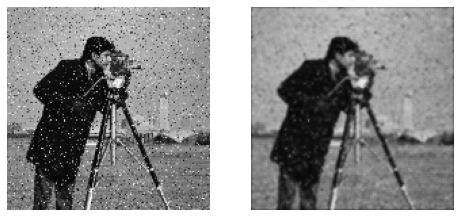

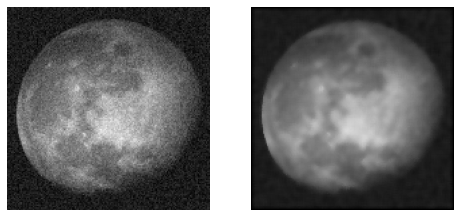

In [11]:
camerabl = bilateralFilter(camera,3,150.0,100.0)
moonbl = bilateralFilter(moon,5,50.0,100.0)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(camera, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(camerabl, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(moon, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(moonbl, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

**Example Laplacian Filter:**

(-0.5, 299.5, 299.5, -0.5)

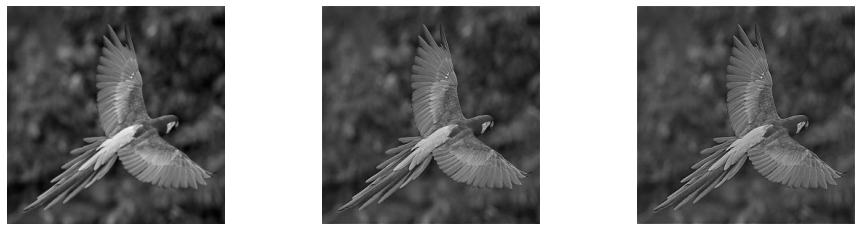

In [12]:
araralf = laplacianFilter(arara,0.5,1)
araralf2 = laplacianFilter(arara,0.75,2)

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(arara, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(132)
plt.imshow(araralf, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(133)
plt.imshow(araralf2, cmap="gray", vmin=0, vmax=255)
plt.axis('off')


**Example Vignette Filter:**

(-0.5, 198.5, 170.5, -0.5)

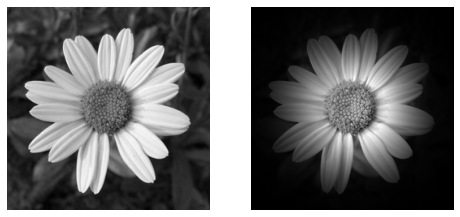

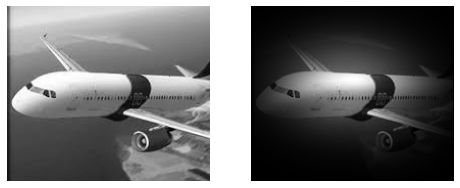

In [13]:
flowervf = vignetteFilter(flower,50.0,50.0)
airplanevf = vignetteFilter(airplane,30,45)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(flower, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(flowervf, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(airplane, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(airplanevf, cmap="gray", vmin=0, vmax=255)
plt.axis('off')